Timestamp
2019-03-31 06:27:00    1.2548
2019-03-31 07:18:00    1.2252
2019-03-31 08:25:00    1.2520
2019-03-31 10:05:00    1.2469
2019-03-31 10:38:00    1.2359
Name: Price, dtype: float64


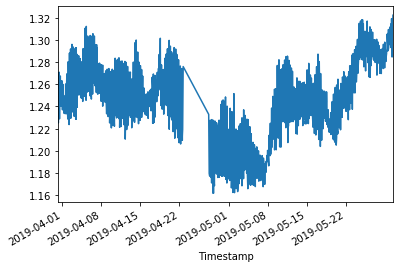

In [8]:
# load and plot dataset
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from pandas import Series
from sklearn.preprocessing import MinMaxScaler


# load dataset
def parser(x):
	return datetime.strptime(x, '%m/%d/%y %H:%M')
series = read_csv('short_test.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
# summarize first few rows
print(series.head())
# line plot
series.plot()
pyplot.show()

In [9]:
series.head()

Timestamp
2019-03-31 06:27:00    1.2548
2019-03-31 07:18:00    1.2252
2019-03-31 08:25:00    1.2520
2019-03-31 10:05:00    1.2469
2019-03-31 10:38:00    1.2359
Name: Price, dtype: float64

In [10]:
# transform scale
X = series.values
X = X.reshape(len(X), 1)
scaler = MinMaxScaler(feature_range=(-1, 1))
scaler = scaler.fit(X)
scaled_X = scaler.transform(X)
scaled_series = Series(scaled_X[:, 0])
print(scaled_series.head())

0    0.158879
1   -0.209969
2    0.123988
3    0.060436
4   -0.076636
dtype: float64


In [11]:
# invert transform
inverted_X = scaler.inverse_transform(scaled_X)
inverted_series = Series(inverted_X[:, 0])
print(inverted_series.head())

0    1.2548
1    1.2252
2    1.2520
3    1.2469
4    1.2359
dtype: float64
